**Generation of Embeddings**

In [1]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from sklearn.decomposition import PCA
import os
import pandas as pd

# Assuming your dataframe has columns 'subject', 'predicate', 'object'
triplet_folder='Triplets/'
dist_ent_emb=[]
dist_rel_emb=[]
trans_ent_emb=[]
trans_rel_emb=[]
count=0
order=[]
for comp in os.listdir(triplet_folder):
    print(count,comp)
    order.append(comp[:-4])
    count=count+1
    triplet_df=pd.read_csv(triplet_folder+comp)
    triples_factory = TriplesFactory.from_labeled_triples(triplet_df[['head', 'type', 'tail']].values,)

    training = triples_factory
    validation = triples_factory
    testing = triples_factory

    d=training
    id_to_entity={v: k for k, v in d.entity_to_id.items()}
    id_to_relation={v: k for k, v in d.relation_to_id.items()}

    for i in d.map_triples(d.triples):
        s,p,o =int(i[0]), int(i[1]), int(i[2])
        h,r,t = id_to_entity[s], id_to_relation[p], id_to_entity[o]

    result1 = pipeline(
        model='DistMult',
        loss="softplus",
        training=training,
        testing=testing,
        validation=validation,
        model_kwargs=dict(embedding_dim=50, random_seed=42),  # Increase the embedding dimension
        optimizer_kwargs=dict(lr=0.1),  # Adjust the learning rate
        training_kwargs=dict(num_epochs=25, use_tqdm_batch=False),)  # Increase the number of epochs)

    result2 = pipeline(
        model='TransE',
        loss="softplus",
        training=training,
        testing=testing,
        validation=validation,
        model_kwargs=dict(embedding_dim=50, random_seed=42),  # Increase the embedding dimension
        optimizer_kwargs=dict(lr=0.1),  # Adjust the learning rate
        training_kwargs=dict(num_epochs=25, use_tqdm_batch=False),  # Increase the number of epochs
    )

    # The trained model is stored in the pipeline result
    model1 = result1.model
    model2 = result2.model

    pca = PCA(n_components=2)
    entity_embeddings1 = model1.entity_representations[0](indices=None).detach().cpu().numpy()
    m = pca.fit(entity_embeddings1)
    eu = m.transform(entity_embeddings1)
    relation_embeddings1 = model1.relation_representations[0](indices=None).detach().cpu().numpy()
    ru = pca.transform(relation_embeddings1)

    pca = PCA(n_components=2)
    entity_embeddings2 = model2.entity_representations[0](indices=None).detach().cpu().numpy()
    m = pca.fit(entity_embeddings2)
    eu = m.transform(entity_embeddings2)
    relation_embeddings2 = model2.relation_representations[0](indices=None).detach().cpu().numpy()
    ru = pca.transform(relation_embeddings2)

    dist_ent_emb.append(entity_embeddings1)
    trans_ent_emb.append(entity_embeddings2)
    dist_rel_emb.append(relation_embeddings1)
    trans_rel_emb.append(relation_embeddings2)



C:\Users\raksh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Reconstructing all label-based triples. This is expensive and rarely needed.
No random seed is specified. Setting to 2811408364.


0 AA01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.30s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


1 ABG01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/31.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/31.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


2 AC12_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/51.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/51.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


3 ADANI54145_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/64.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/64.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.pipeline.api:Using device: None


4 AE01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/61.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/61.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


5 AI49_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/53.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/53.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


6 AM07_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/45.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/45.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


7 AM9_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/36.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/36.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


8 API_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


9 AS28_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/45.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/45.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


10 ATI_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


11 BA06_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/48.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/48.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


12 BAF_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/38.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/38.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


13 BF04_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/27.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/27.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.pipeline.api:Using device: None


14 BHE_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/62.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/62.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


15 BI26_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/35.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/35.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


16 BI_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/39.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/39.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


17 BP11_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/43.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/43.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


18 BS13_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


19 BT08_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/46.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/46.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


20 BTV_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/61.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/61.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


21 CI29_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/53.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/53.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.pipeline.api:Using device: None


22 C_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/49.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/49.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
INFO:pykeen.pipeline.api:Using device: None


23 D04_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/38.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/38.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


24 DC05_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/42.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/42.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


25 EC7_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/50.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/50.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


26 ED_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/41.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/41.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


27 EM_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/37.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/37.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


28 ES8_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/59.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/59.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


29 GAI_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/36.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/36.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


30 GG03_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/57.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/57.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


31 GIF_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/25.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/25.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


32 HCL02_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/53.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/53.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


33 HDF01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/56.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/56.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


34 HDF_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


35 HDO_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/49.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/49.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


36 HL_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


37 HSL01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/42.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/42.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


38 IPL01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/36.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/36.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


39 ITC_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/43.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/43.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


40 IT_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/46.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/46.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


41 IVR_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/58.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/58.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


42 JFS_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/21.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/21.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


43 JI07_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


44 JS03_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/51.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/51.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


45 JV01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/31.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/31.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


46 KDI01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


47 LI09_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/41.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/41.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


48 LI10_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/60.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/60.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


49 LIC09_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/48.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/48.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


50 LPS_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/48.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/48.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


51 LTS_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/26.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/26.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


52 MBI_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/48.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/48.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
INFO:pykeen.pipeline.api:Using device: None


53 MC20_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/41.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/41.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


54 ME12_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/31.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/31.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


55 MSI08_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/53.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/53.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


56 MU01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


57 MU02_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/51.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/51.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


58 MV01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/35.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/35.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


59 NOR_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


60 NTP_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


61 OC13_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/43.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/43.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


62 OCP_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/53.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/53.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


63 ONG_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/50.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/50.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
INFO:pykeen.pipeline.api:Using device: None


64 PD06_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/40.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/40.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


65 PGC_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/41.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/41.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


66 PHH_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/52.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/52.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


67 PI31_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/48.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/48.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


68 PI33_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/44.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/44.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


69 PL9_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


70 PS15_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/31.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/31.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


71 PSL_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/43.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/43.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


72 RA06_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


73 RCV02_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


74 RI_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/58.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/58.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds
INFO:pykeen.pipeline.api:Using device: None


75 RP01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/35.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/35.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


76 S15_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/42.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/42.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


77 SBM01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/49.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/49.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


78 SCT02_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/50.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/50.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


79 SFC_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/46.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/46.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.pipeline.api:Using device: None


80 SG_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/51.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/51.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


81 SHE_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/51.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/51.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


82 SM14_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/46.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/46.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
INFO:pykeen.pipeline.api:Using device: None


83 SMC05_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


84 SPI_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/56.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/56.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.pipeline.api:Using device: None


85 SS28_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/34.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/34.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


86 TC15_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/42.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/42.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


87 TCS_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/58.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/58.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


88 TE11_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/48.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/48.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


89 TEI_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/34.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/34.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.pipeline.api:Using device: None


90 TEL_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/57.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/57.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.pipeline.api:Using device: None


91 TI01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/38.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/38.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
INFO:pykeen.pipeline.api:Using device: None


92 TJ01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/49.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/49.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


93 TM4_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/38.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/38.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


94 TW02_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/50.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/50.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


95 UA01_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


96 UBE_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/47.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds
INFO:pykeen.pipeline.api:Using device: None


97 UI17_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/44.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/44.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


98 UTC_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/49.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/49.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
INFO:pykeen.pipeline.api:Using device: None


99 VLF_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/60.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.14s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/60.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds
INFO:pykeen.pipeline.api:Using device: None


100 W_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/46.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/46.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
INFO:pykeen.pipeline.api:Using device: None


101 ZT_triplets.csv


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/44.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Evaluating on cuda:0:   0%|          | 0.00/44.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds


**Loading Stored Variables**

In [1]:
import joblib
dist_ent_emb,dist_rel_emb,trans_ent_emb,trans_rel_emb=joblib.load('variables.joblib')

In [ ]:
**AVERAGING EMBEDDINGS**

In [2]:
import numpy as np
dist_ent_avg=[]
dist_rel_avg=[]
trans_ent_avg=[]
trans_rel_avg=[]
for e in dist_ent_emb:
    dist_ent_avg.append(np.mean(e))
for e in dist_rel_emb:
    dist_rel_avg.append(np.mean(e))
for e in trans_ent_emb:
    trans_ent_avg.append(np.mean(e))
for e in trans_rel_emb:
    trans_rel_avg.append(np.mean(e))


In [3]:
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load data from CSV file
file_path = "Dataset - Calculated_Ratios.csv"  # Update this with the path to your CSV file
data = pd.read_csv(file_path)

C:\Users\raksh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data.head()

,Companies,Code,Net Working Capital/ Tot Assets,EBIDTA/ Total Assets,Market Cap/ Total Debt,Revenue/Tot Assets,Current Ratio,Quick Ratio,EBIDTA/ Revenue,D/A Ratio,...,Operating Expenses/ Total Liabilities,Current Assets/ Total Liabilities,Current Liabilities/ Total Assets,Equity/Fixed Assets,Total Expenses/ Total Revenue,Long-tern Liabilities/ Equity,Revenue/Liabilities,Revenue/Short-term Liabilities,Revenue/Fixed Assets,Label
0,ABGSHIP,ABG01,-0.078,-0.178,0.001,0.001,0.902,0.34,-219.667,1.254,...,0.000,0.576,0.801,-0.918,368.222,-3.150,0.001,0.002,0.003,1
1,Adani Enterprises,AE01,-0.054,0.026,1.822,0.967,0.829,0.67,0.026,0.775,...,0.146,0.358,0.317,0.305,0.983,1.406,1.321,2.327,1.311,0
2,Adani Green Energy,ADANI54145,-0.009,-0.004,2.224,0.113,0.925,0.92,-0.035,0.913,...,0.000,0.130,0.125,0.099,1.137,1.436,0.127,0.148,0.128,0
3,ADHUNIK,AM9,-0.919,-0.026,0.000,0.000,0.101,0.06,-4648.000,2.001,...,0.000,0.052,1.022,-1.116,4689.000,-1.021,0.000,0.000,0.000,1
4,ALOKTEXT,ATI,-0.128,-0.122,0.234,0.930,0.640,0.27,-0.131,3.385,...,0.000,0.067,0.357,-3.091,1.150,-0.149,0.275,0.307,1.205,1


In [5]:
# Extract company names (assuming 'Company_Name' is the column name for company names)
company_names = data['Companies']

In [6]:
# Extract features (assuming the first column is 'Company_Name' and the rest are features)
features = data.drop(columns=['Companies','Label','Code'])
labels=data['Label']

In [7]:
scaler=MinMaxScaler()
norm_features=scaler.fit_transform(features)

In [8]:
norm_features=pd.DataFrame(norm_features,columns=list(features.columns))

**VARIANCE THRESHOLD**

In [9]:
# Apply Variance Threshold
threshold = 0.01  # Set the variance threshold as desired
selector = VarianceThreshold(threshold=threshold)
selected_features = selector.fit_transform(norm_features)

In [10]:
# Get the selected feature columns based on the threshold
selected_feature_columns = norm_features.columns[selector.get_support()]

In [11]:
# Create a new DataFrame with selected features
selected_features_df = pd.DataFrame(selected_features, columns=selected_feature_columns)

In [12]:
# Concatenate company names with selected features
selected_data = pd.concat([company_names, selected_features_df], axis=1)

In [13]:
selected_data

,Companies,Net Working Capital/ Tot Assets,EBIDTA/ Total Assets,Market Cap/ Total Debt,Revenue/Tot Assets,Current Ratio,Quick Ratio,D/A Ratio,Equity/Tot Assets,Gross Rev/ Curr Liabilities,...,EBIDTA/ Tot Liabilities,Net Profit/ Operating Expenses,Operating Expense/ Current Liabilities,Operating Expenses/ Total Liabilities,Current Assets/ Total Liabilities,Current Liabilities/ Total Assets,Equity/Fixed Assets,Revenue/Liabilities,Revenue/Short-term Liabilities,Revenue/Fixed Assets
0,ABGSHIP,0.968113,0.936722,0.000006,0.000302,0.109967,0.002599,0.045357,0.954643,0.000031,...,0.602344,0.064790,0.000000,0.000000,0.071102,0.028986,0.680448,0.000041,1.496110e-07,0.000166
1,Adani Enterprises,0.968964,0.957712,0.010590,0.292322,0.101018,0.005199,0.027934,0.972066,0.095318,...,0.639389,0.067519,0.092278,0.048732,0.044145,0.011383,0.705067,0.053855,1.740724e-04,0.072716
2,Adani Green Energy,0.970560,0.954625,0.012927,0.034160,0.112787,0.007168,0.032954,0.967046,0.028184,...,0.631226,0.057905,0.000000,0.000000,0.015952,0.004401,0.700920,0.005178,1.107121e-05,0.007100
3,ADHUNIK,0.938283,0.952361,0.000000,0.000000,0.011769,0.000394,0.072528,0.927472,0.000000,...,0.629343,0.130066,0.000000,0.000000,0.006306,0.037024,0.676463,0.000000,0.000000e+00,0.000000
4,ALOKTEXT,0.966339,0.942484,0.001360,0.281137,0.077847,0.002048,0.122868,0.877132,0.081429,...,0.624529,0.041875,0.000000,0.000000,0.008161,0.012838,0.636708,0.011211,2.296529e-05,0.066837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Vedanta,0.965914,0.965737,0.008079,0.224002,0.083609,0.003545,0.028807,0.971193,0.051561,...,0.661155,0.067519,0.096386,0.070427,0.050822,0.016148,0.704765,0.040360,1.846948e-04,0.059349
100,VICEROY,0.943142,0.957300,0.000076,0.116082,0.020351,0.001260,0.096243,0.903757,0.012703,...,0.633738,0.067519,0.015882,0.007009,0.007419,0.034150,0.659273,0.005911,1.675643e-05,0.025348
101,VIDEOIND,0.937077,0.942792,0.000012,0.005441,0.025377,0.000945,0.044011,0.955989,0.000468,...,0.611553,0.067515,0.002191,0.002670,0.025968,0.043861,0.693049,0.000612,2.037702e-04,0.001331
102,Wipro,0.982797,0.968001,0.039448,0.233676,0.302072,0.022450,0.012003,0.987997,0.105493,...,0.710548,0.067519,0.156900,0.129840,0.207370,0.008183,0.729564,0.093603,5.359066e-04,0.098342


In [14]:
# Save the selected features to a new CSV file
selected_data.to_csv('sf_new.csv', index=False)

**CORRELATION ANALYSIS**

In [15]:
norm_data=norm_features.copy()
norm_data['Label']=labels

In [16]:
norm_data

,Net Working Capital/ Tot Assets,EBIDTA/ Total Assets,Market Cap/ Total Debt,Revenue/Tot Assets,Current Ratio,Quick Ratio,EBIDTA/ Revenue,D/A Ratio,D/E Ratio,Equity/Tot Assets,...,Operating Expenses/ Total Liabilities,Current Assets/ Total Liabilities,Current Liabilities/ Total Assets,Equity/Fixed Assets,Total Expenses/ Total Revenue,Long-tern Liabilities/ Equity,Revenue/Liabilities,Revenue/Short-term Liabilities,Revenue/Fixed Assets,Label
0,0.968113,0.936722,0.000006,0.000302,0.109967,0.002599,0.952514,0.045357,0.891719,0.954643,...,0.000000,0.071102,0.028986,0.680448,0.078505,0.886010,0.000041,1.496110e-07,0.000166,1
1,0.968964,0.957712,0.010590,0.292322,0.101018,0.005199,0.999769,0.027934,0.900323,0.972066,...,0.048732,0.044145,0.011383,0.705067,0.000183,0.915449,0.053855,1.740724e-04,0.072716,0
2,0.970560,0.954625,0.012927,0.034160,0.112787,0.007168,0.999756,0.032954,0.907638,0.967046,...,0.000000,0.015952,0.004401,0.700920,0.000216,0.915643,0.005178,1.107121e-05,0.007100,0
3,0.938283,0.952361,0.000000,0.000000,0.011769,0.000394,0.000000,0.072528,0.894802,0.927472,...,0.000000,0.006306,0.037024,0.676463,1.000000,0.899767,0.000000,0.000000e+00,0.000000,1
4,0.966339,0.942484,0.001360,0.281137,0.077847,0.002048,0.999735,0.122868,0.895412,0.877132,...,0.000000,0.008161,0.012838,0.636708,0.000219,0.905401,0.011211,2.296529e-05,0.066837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.965914,0.965737,0.008079,0.224002,0.083609,0.003545,0.999794,0.028807,0.900824,0.971193,...,0.070427,0.050822,0.016148,0.704765,0.000164,0.920793,0.040360,1.846948e-04,0.059349,0
100,0.943142,0.957300,0.000076,0.116082,0.020351,0.001260,0.999775,0.096243,0.895217,0.903757,...,0.007009,0.007419,0.034150,0.659273,0.000188,0.902674,0.005911,1.675643e-05,0.025348,1
101,0.937077,0.942792,0.000012,0.005441,0.025377,0.000945,0.998333,0.044011,0.891010,0.955989,...,0.002670,0.025968,0.043861,0.693049,0.002522,0.870340,0.000612,2.037702e-04,0.001331,1
102,0.982797,0.968001,0.039448,0.233676,0.302072,0.022450,0.999798,0.012003,0.897438,0.987997,...,0.129840,0.207370,0.008183,0.729564,0.000157,0.908593,0.093603,5.359066e-04,0.098342,0


In [17]:
corr_mat=norm_data.corr()

In [18]:
corr_mat

,Net Working Capital/ Tot Assets,EBIDTA/ Total Assets,Market Cap/ Total Debt,Revenue/Tot Assets,Current Ratio,Quick Ratio,EBIDTA/ Revenue,D/A Ratio,D/E Ratio,Equity/Tot Assets,...,Operating Expenses/ Total Liabilities,Current Assets/ Total Liabilities,Current Liabilities/ Total Assets,Equity/Fixed Assets,Total Expenses/ Total Revenue,Long-tern Liabilities/ Equity,Revenue/Liabilities,Revenue/Short-term Liabilities,Revenue/Fixed Assets,Label
Net Working Capital/ Tot Assets,1.000000,0.857796,0.112063,0.032850,0.285410,0.069551,0.003421,-0.986025,-0.039981,0.986025,...,0.090296,0.225199,-0.996011,0.836786,-0.002699,-0.018233,0.145679,-0.493492,0.147019,-0.271055
EBIDTA/ Total Assets,0.857796,1.000000,0.111309,0.063290,0.205278,0.043261,-0.012417,-0.846687,-0.009089,0.846687,...,0.104961,0.188877,-0.853743,0.618074,0.012664,0.008109,0.154452,-0.580564,0.101362,-0.265592
Market Cap/ Total Debt,0.112063,0.111309,1.000000,0.191571,0.640197,0.344426,0.044907,-0.148144,0.029042,0.148144,...,0.144753,0.812784,-0.112743,0.151093,-0.045844,0.041275,0.583899,-0.068445,0.104172,-0.374484
Revenue/Tot Assets,0.032850,0.063290,0.191571,1.000000,0.109737,-0.066761,0.119365,-0.052492,0.065951,0.052492,...,0.244300,0.192173,-0.016586,0.082700,-0.122008,0.081787,0.551984,0.154412,0.563356,-0.187684
Current Ratio,0.285410,0.205278,0.640197,0.109737,1.000000,0.253731,0.104480,-0.273468,-0.346415,0.273468,...,0.087538,0.804722,-0.264509,0.340372,-0.104816,-0.331074,0.355327,-0.157181,0.262095,-0.450893
Quick Ratio,0.069551,0.043261,0.344426,-0.066761,0.253731,1.000000,0.024003,-0.054351,-0.022226,0.054351,...,0.011526,0.239270,-0.052891,0.160899,-0.024448,0.000151,-0.023515,-0.036979,0.284247,-0.175444
EBIDTA/ Revenue,0.003421,-0.012417,0.044907,0.119365,0.104480,0.024003,1.000000,-0.011944,-0.008296,0.011944,...,0.044041,0.089402,0.009448,0.015547,-0.999528,-0.007278,0.064165,0.024270,0.082080,-0.112999
D/A Ratio,-0.986025,-0.846687,-0.148144,-0.052492,-0.273468,-0.054351,-0.011944,1.000000,0.007323,-1.000000,...,-0.111596,-0.258009,0.984525,-0.841025,0.011695,-0.012419,-0.178655,0.482012,-0.122184,0.301367
D/E Ratio,-0.039981,-0.009089,0.029042,0.065951,-0.346415,-0.022226,-0.008296,0.007323,1.000000,-0.007323,...,0.024964,-0.022204,0.021284,0.006728,0.008322,0.981627,0.039554,0.011437,-0.117602,-0.116172
Equity/Tot Assets,0.986025,0.846687,0.148144,0.052492,0.273468,0.054351,0.011944,-1.000000,-0.007323,1.000000,...,0.111596,0.258009,-0.984525,0.841025,-0.011695,0.012419,0.178655,-0.482012,0.122184,-0.301367


In [19]:
for f in corr_mat['Label'].keys():
    if abs(corr_mat['Label'][f])<0.15:
        norm_data=norm_data.drop([f],axis=1)
        if f=='Label':
            continue

In [20]:
norm_data

,Net Working Capital/ Tot Assets,EBIDTA/ Total Assets,Market Cap/ Total Debt,Revenue/Tot Assets,Current Ratio,Quick Ratio,D/A Ratio,Equity/Tot Assets,Gross Rev/ Curr Liabilities,EBIDTA/ Assets,...,EBIDTA/ Tot Liabilities,Net Profit/ Operating Expenses,Operating Expense/ Current Liabilities,Operating Expenses/ Total Liabilities,Current Assets/ Total Liabilities,Current Liabilities/ Total Assets,Equity/Fixed Assets,Revenue/Liabilities,Revenue/Short-term Liabilities,Label
0,0.968113,0.936722,0.000006,0.000302,0.109967,0.002599,0.045357,0.954643,0.000031,0.936722,...,0.602344,0.064790,0.000000,0.000000,0.071102,0.028986,0.680448,0.000041,1.496110e-07,1
1,0.968964,0.957712,0.010590,0.292322,0.101018,0.005199,0.027934,0.972066,0.095318,0.957712,...,0.639389,0.067519,0.092278,0.048732,0.044145,0.011383,0.705067,0.053855,1.740724e-04,0
2,0.970560,0.954625,0.012927,0.034160,0.112787,0.007168,0.032954,0.967046,0.028184,0.954625,...,0.631226,0.057905,0.000000,0.000000,0.015952,0.004401,0.700920,0.005178,1.107121e-05,0
3,0.938283,0.952361,0.000000,0.000000,0.011769,0.000394,0.072528,0.927472,0.000000,0.952361,...,0.629343,0.130066,0.000000,0.000000,0.006306,0.037024,0.676463,0.000000,0.000000e+00,1
4,0.966339,0.942484,0.001360,0.281137,0.077847,0.002048,0.122868,0.877132,0.081429,0.942484,...,0.624529,0.041875,0.000000,0.000000,0.008161,0.012838,0.636708,0.011211,2.296529e-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.965914,0.965737,0.008079,0.224002,0.083609,0.003545,0.028807,0.971193,0.051561,0.965737,...,0.661155,0.067519,0.096386,0.070427,0.050822,0.016148,0.704765,0.040360,1.846948e-04,0
100,0.943142,0.957300,0.000076,0.116082,0.020351,0.001260,0.096243,0.903757,0.012703,0.957300,...,0.633738,0.067519,0.015882,0.007009,0.007419,0.034150,0.659273,0.005911,1.675643e-05,1
101,0.937077,0.942792,0.000012,0.005441,0.025377,0.000945,0.044011,0.955989,0.000468,0.942792,...,0.611553,0.067515,0.002191,0.002670,0.025968,0.043861,0.693049,0.000612,2.037702e-04,1
102,0.982797,0.968001,0.039448,0.233676,0.302072,0.022450,0.012003,0.987997,0.105493,0.968001,...,0.710548,0.067519,0.156900,0.129840,0.207370,0.008183,0.729564,0.093603,5.359066e-04,0


In [21]:
selected_features1=list(norm_data)
selected_features1.remove('Label')
selected_features1

['Net Working Capital/ Tot Assets',
 'EBIDTA/ Total Assets',
 'Market Cap/ Total Debt',
 'Revenue/Tot Assets',
 'Current Ratio',
 'Quick Ratio',
 'D/A Ratio',
 'Equity/Tot Assets',
 'Gross Rev/ Curr Liabilities',
 'EBIDTA/ Assets',
 'Equity-ShareCapital/ Total Assets',
 'EBIDTA/ Tot Liabilities',
 'Net Profit/ Operating Expenses',
 'Operating Expense/ Current Liabilities',
 'Operating Expenses/ Total Liabilities',
 'Current Assets/ Total Liabilities',
 'Current Liabilities/ Total Assets',
 'Equity/Fixed Assets',
 'Revenue/Liabilities',
 'Revenue/Short-term Liabilities']

**INFORMATION GAIN**

In [22]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif

info_gain = mutual_info_classif(norm_features, labels)

# Print information gain for each feature
for i, gain in enumerate(info_gain):
    print(f"Feature {i + 1}: {gain}")

# Select the top k features based on information gain
k = 19
top_k_indices = np.argsort(info_gain)[::-1][:k]
print(top_k_indices)
# Extract the selected features
selected_features2 = []
for i in top_k_indices:
    selected_features2.append(norm_features.columns[i])

selected_features2

df3=pd.DataFrame(norm_features,columns=selected_features2)
df3

Feature 1: 0.2805460318794901
Feature 2: 0.4102619193185706
Feature 3: 0.3639753312583702
Feature 4: 0.06568142559654011
Feature 5: 0.2362874582642247
Feature 6: 0.36621331792558687
Feature 7: 0.4446695428490661
Feature 8: 0.30259299000543827
Feature 9: 0.30382036058481554
Feature 10: 0.2996167995292478
Feature 11: 0.22249804977400278
Feature 12: 0.4129252282318796
Feature 13: 0.358414422346647
Feature 14: 0.4571833645149028
Feature 15: 0.48463161389398035
Feature 16: 0.2770873429958556
Feature 17: 0.44380840428519885
Feature 18: 0.0
Feature 19: 0.06352088383319132
Feature 20: 0.15448563272111948
Feature 21: 0.26684308809967106
Feature 22: 0.35865730457057343
Feature 23: 0.4461000367373502
Feature 24: 0.38622232316485006
Feature 25: 0.26636330081388704
Feature 26: 0.05597172500433789
Feature 27: 0.06248775171267229
[14 13 22  6 16 11  1 23  5  2 21 12  8  7  9  0 15 20 24]


,Net Profit/ Operating Expenses,EBIDTA/ Tot Liabilities,Total Expenses/ Total Revenue,EBIDTA/ Revenue,EBIT/Sales,EBIDTA/ Assets,EBIDTA/ Total Assets,Long-tern Liabilities/ Equity,Quick Ratio,Market Cap/ Total Debt,Equity/Fixed Assets,Equity-ShareCapital/ Total Assets,D/E Ratio,D/A Ratio,Equity/Tot Assets,Net Working Capital/ Tot Assets,Total Liabilities -Cash/ Sales,Current Liabilities/ Total Assets,Revenue/Liabilities
0,0.064790,0.602344,0.078505,0.952514,0.920776,0.936722,0.936722,0.886010,0.002599,0.000006,0.680448,0.953678,0.891719,0.045357,0.954643,0.968113,4.259940e-03,0.028986,0.000041
1,0.067519,0.639389,0.000183,0.999769,0.999769,0.957712,0.957712,0.915449,0.005199,0.010590,0.705067,0.972214,0.900323,0.027934,0.972066,0.968964,1.955746e-06,0.011383,0.053855
2,0.057905,0.631226,0.000216,0.999756,0.999756,0.954625,0.954625,0.915643,0.007168,0.012927,0.700920,0.966433,0.907638,0.032954,0.967046,0.970560,2.130297e-05,0.004401,0.005178
3,0.130066,0.629343,1.000000,0.000000,0.000000,0.952361,0.952361,0.899767,0.000394,0.000000,0.676463,0.925495,0.894802,0.072528,0.927472,0.938283,1.000000e+00,0.037024,0.000000
4,0.041875,0.624529,0.000219,0.999735,0.999735,0.942484,0.942484,0.905401,0.002048,0.001360,0.636708,0.874223,0.895412,0.122868,0.877132,0.966339,9.964067e-06,0.012838,0.011211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.067519,0.661155,0.000164,0.999794,0.999794,0.965737,0.965737,0.920793,0.003545,0.008079,0.704765,0.971311,0.900824,0.028807,0.971193,0.965914,2.564323e-06,0.016148,0.040360
100,0.067519,0.633738,0.000188,0.999775,0.999775,0.957300,0.957300,0.902674,0.001260,0.000076,0.659273,0.898071,0.895217,0.096243,0.903757,0.943142,1.833477e-05,0.034150,0.005911
101,0.067515,0.611553,0.002522,0.998333,0.998333,0.942792,0.942792,0.870340,0.000945,0.000012,0.693049,0.956027,0.891010,0.044011,0.955989,0.937077,1.876603e-04,0.043861,0.000612
102,0.067519,0.710548,0.000157,0.999798,0.999798,0.968001,0.968001,0.908593,0.022450,0.039448,0.729564,0.987751,0.897438,0.012003,0.987997,0.982797,8.243454e-07,0.008183,0.093603


**COMMON SELECTED FEATURES**

In [23]:
sf1=set(selected_feature_columns)
sf2=set(selected_features1)
sf3=set(selected_features2)
final_features=list(sf1.intersection(sf2).intersection(sf3))
final_columns=final_features
final_columns=final_columns.append('Label')
print(final_features)

['Equity/Tot Assets', 'Net Profit/ Operating Expenses', 'Quick Ratio', 'EBIDTA/ Tot Liabilities', 'Market Cap/ Total Debt', 'Equity-ShareCapital/ Total Assets', 'EBIDTA/ Assets', 'Equity/Fixed Assets', 'EBIDTA/ Total Assets', 'Current Liabilities/ Total Assets', 'Net Working Capital/ Tot Assets', 'D/A Ratio', 'Revenue/Liabilities', 'Label']


In [24]:
import os
triplet_folder='Triplets/'
order=[]
for comp in os.listdir(triplet_folder):
    order.append(comp[:-4])

In [25]:
norm_data['Dist_Ent_Embedding']=0
norm_data['Dist_Rel_Embedding']=0
norm_data['Trans_Ent_Embedding']=0
norm_data['Trans_Rel_Embedding']=0
c=''
main_i=0
for i in range(102):
    c=order[i][:-9]
    main_i=data.index[data['Code']==c]
    norm_data.loc[data['Code']==c,"Dist_Ent_Embedding"]=dist_ent_avg[i]
    norm_data.loc[data['Code']==c,"Dist_Rel_Embedding"]=dist_rel_avg[i]
    norm_data.loc[data['Code']==c,"Trans_Ent_Embedding"]=trans_ent_avg[i]
    norm_data.loc[data['Code']==c,"Trans_Rel_Embedding"]=trans_rel_avg[i]
#     norm_data.at[main_i,"Dist_Ent_embedding"]=dist_ent_avg[i]
#     norm_data.loc[data['Code']==c,"Dist_Rel_Embedding"]=dist_rel_avg[i]
#     norm_data.loc[data['Code']==c,"Trans_Ent_Embedding"]=trans_ent_avg[i]
#     norm_data.loc[data['Code']==c,"Trans_Rel_Embedding"]=trans_rel_avg[i]
final_features.append('Dist_Ent_Embedding')
final_features.append('Dist_Rel_Embedding')
final_features.append('Trans_Ent_Embedding')
final_features.append('Trans_Rel_Embedding')

**TRAIN-TEST SPLIT**

In [26]:
final_data=norm_data[final_features]
temp=scaler.fit_transform(final_data)
final_data=pd.DataFrame(temp,columns=list(final_data.columns))
train_data=final_data.loc[0:80]
test_data=final_data.loc[81:]
x_train=train_data.drop('Label',axis=1)
y_train=train_data['Label']
x_test=test_data.drop('Label',axis=1)
y_test=test_data['Label']

In [27]:
x_train

,Equity/Tot Assets,Net Profit/ Operating Expenses,Quick Ratio,EBIDTA/ Tot Liabilities,Market Cap/ Total Debt,Equity-ShareCapital/ Total Assets,EBIDTA/ Assets,Equity/Fixed Assets,EBIDTA/ Total Assets,Current Liabilities/ Total Assets,Net Working Capital/ Tot Assets,D/A Ratio,Revenue/Liabilities,Dist_Ent_Embedding,Dist_Rel_Embedding,Trans_Ent_Embedding,Trans_Rel_Embedding
0,0.954643,0.064790,0.002599,0.602344,0.000006,0.953678,0.936722,0.680448,0.936722,0.028986,0.968113,0.045357,0.000041,0.214449,0.533749,0.506666,0.403446
1,0.972066,0.067519,0.005199,0.639389,0.010590,0.972214,0.957712,0.705067,0.957712,0.011383,0.968964,0.027934,0.053855,0.235585,0.736623,0.330210,0.811761
2,0.967046,0.057905,0.007168,0.631226,0.012927,0.966433,0.954625,0.700920,0.954625,0.004401,0.970560,0.032954,0.005178,0.543115,0.618184,0.549330,0.586417
3,0.927472,0.130066,0.000394,0.629343,0.000000,0.925495,0.952361,0.676463,0.952361,0.037024,0.938283,0.072528,0.000000,0.263189,0.313912,0.439111,0.561843
4,0.877132,0.041875,0.002048,0.624529,0.001360,0.874223,0.942484,0.636708,0.942484,0.012838,0.966339,0.122868,0.011211,0.485080,0.421138,0.395118,0.659524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.895282,0.068076,0.004963,0.636459,0.000639,0.895830,0.961313,0.612331,0.961313,0.039242,0.952364,0.104718,0.008806,0.179363,0.672708,0.649377,0.245546
77,0.957335,0.067511,0.006932,0.551695,0.006475,0.955413,0.908324,0.674430,0.908324,0.039933,0.962012,0.042665,0.072078,0.579224,0.533294,0.223531,0.791211
78,0.928345,0.067519,0.001891,0.625157,0.000012,0.928241,0.948451,0.675376,0.948451,0.020803,0.956301,0.071655,0.002283,0.543661,0.807263,0.413434,0.628108
79,0.927218,0.064574,0.010634,0.620971,0.000372,0.923472,0.944130,0.664607,0.944130,0.072592,0.914411,0.072782,0.065188,0.433063,0.707059,0.578316,0.540025


**RANDOM FOREST CLASSIFIER**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

In [109]:
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Random Forest Classifier")
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Sensitivity : ", metrics.recall_score(y_test , y_pred)*100,"%")
print("Specificity : ", metrics.recall_score(np.logical_not(y_test) ,np.logical_not(y_pred))*100,"%")
print("Classification Report : ")
print(metrics.classification_report(y_test, y_pred))

Random Forest Classifier
Accuracy :  94.44444444444444 %
Sensitivity :  100.0 %
Specificity :  90.0 %
Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.89      1.00      0.94         8

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



In [110]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RANDOM FOREST CLASSIFIER')

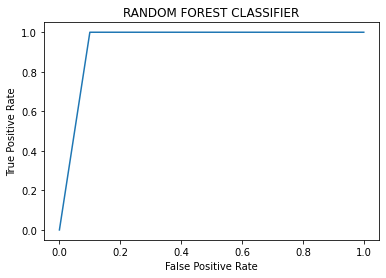

In [111]:
plot_roc_curve(y_test,y_pred)

In [112]:
# import joblib
# joblib.dump((dist_ent_emb,dist_rel_emb,trans_ent_emb,trans_rel_emb), 'variables.joblib')

**SVM CLASSIFIER**

In [113]:
from sklearn.svm import SVC  

In [114]:
clf = SVC(kernel='poly') 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("SVM Classifier")
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Sensitivity : ", metrics.recall_score(y_test , y_pred)*100,"%")
print("Specificity : ", metrics.recall_score(np.logical_not(y_test) ,np.logical_not(y_pred))*100,"%")
print("Classification Report : ")
print(metrics.classification_report(y_test, y_pred))

SVM Classifier
Accuracy :  88.88888888888889 %
Sensitivity :  100.0 %
Specificity :  80.0 %
Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        10
         1.0       0.80      1.00      0.89         8

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.89        18
weighted avg       0.91      0.89      0.89        18



In [115]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVM CLASSIFIER')

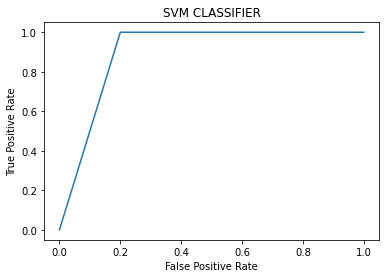

In [116]:
plot_roc_curve(y_test,y_pred)

**XGBOOST CLASSIFIER**

In [117]:
from xgboost import XGBClassifier

In [118]:
!pip install xgboost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
clf = XGBClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("XG Boost Classifier")
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Sensitivity : ", metrics.recall_score(y_test , y_pred)*100,"%")
print("Specificity : ", metrics.recall_score(np.logical_not(y_test) ,np.logical_not(y_pred))*100,"%")
print("Classification Report : ")
print(metrics.classification_report(y_test, y_pred))

XG Boost Classifier
Accuracy :  83.33333333333334 %
Sensitivity :  100.0 %
Specificity :  70.0 %
Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82        10
         1.0       0.73      1.00      0.84         8

    accuracy                           0.83        18
   macro avg       0.86      0.85      0.83        18
weighted avg       0.88      0.83      0.83        18



In [120]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XG Boost CLASSIFIER')

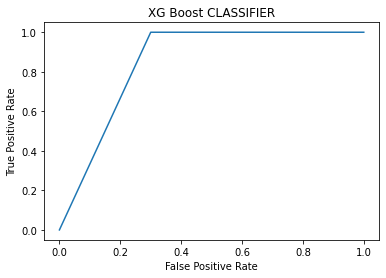

In [121]:
plot_roc_curve(y_test,y_pred)

**DECISION TREE CLASSIFIER**

In [122]:
from sklearn import tree

In [123]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Decision Tree Classifier")
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Sensitivity : ", metrics.recall_score(y_test , y_pred)*100,"%")
print("Specificity : ", metrics.recall_score(np.logical_not(y_test) ,np.logical_not(y_pred))*100,"%")
print("Classification Report : ")
print(metrics.classification_report(y_test, y_pred))

Decision Tree Classifier
Accuracy :  77.77777777777779 %
Sensitivity :  100.0 %
Specificity :  60.0 %
Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75        10
         1.0       0.67      1.00      0.80         8

    accuracy                           0.78        18
   macro avg       0.83      0.80      0.77        18
weighted avg       0.85      0.78      0.77        18



In [124]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree  CLASSIFIER')

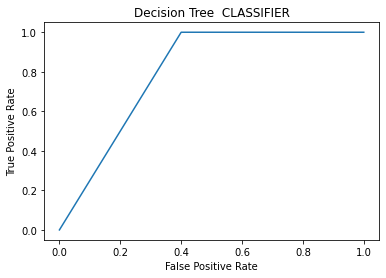

In [125]:
plot_roc_curve(y_test,y_pred)

**ADABOOST CLASSIFIER**


In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
clf = AdaBoostClassifier(n_estimators=50, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Adaboost Classifier")
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Sensitivity : ", metrics.recall_score(y_test , y_pred)*100,"%")
print("Specificity : ", metrics.recall_score(np.logical_not(y_test) ,np.logical_not(y_pred))*100,"%")
print("Classification Report : ")
print(metrics.classification_report(y_test, y_pred))

Adaboost Classifier
Accuracy :  94.44444444444444 %
Sensitivity :  100.0 %
Specificity :  90.0 %
Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.89      1.00      0.94         8

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



In [128]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Adaboost Classifier')

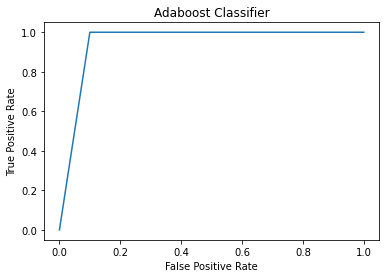

In [129]:
plot_roc_curve(y_test,y_pred)

**LOGISTIC REGRESSION**

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

print("Logistic Regression Model")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred) * 100, "%")
print("Sensitivity: ", metrics.recall_score(y_test, y_pred) * 100, "%")
print("Specificity: ", metrics.recall_score(np.logical_not(y_test), np.logical_not(y_pred)) * 100, "%")  # ~y is the negation of y
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Logistic Regression Model
Accuracy:  66.66666666666666 %
Sensitivity:  100.0 %
Specificity:  40.0 %
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.40      0.57        10
         1.0       0.57      1.00      0.73         8

    accuracy                           0.67        18
   macro avg       0.79      0.70      0.65        18
weighted avg       0.81      0.67      0.64        18



In [131]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression')

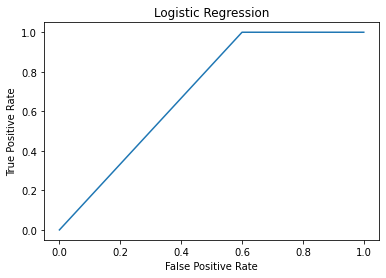

In [132]:
plot_roc_curve(y_test,y_pred)

**K-NEAREST NEIGHBORS ALGORITHM**

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd

# Assuming x_train, x_test, y_train, y_test are already defined

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of n_neighbors

# Fit the model to the training data
knn.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test_scaled)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred) * 100, "%")
print("Sensitivity: ", metrics.recall_score(y_test, y_pred) * 100, "%")
print("Specificity: ", metrics.recall_score(np.logical_not(y_test), np.logical_not(y_pred)) * 100, "%")  # ~y is the negation of y
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

K-Nearest Neighbors (KNN) Model
Accuracy:  77.77777777777779 %
Sensitivity:  75.0 %
Specificity:  80.0 %
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        10
         1.0       0.75      0.75      0.75         8

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18



In [134]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('KNN')

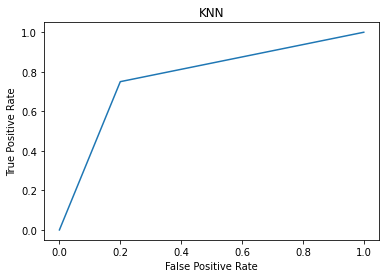

In [135]:
plot_roc_curve(y_test,y_pred)

**GAUSSIAN NAIVE BAYES CLASSIFIER**

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
# Create a Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model on the training set
gnb.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = gnb.predict(x_test)



In [32]:
print("Gaussian Naive Bayes Classifier")
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Sensitivity : ", metrics.recall_score(y_test , y_pred)*100,"%")
print("Specificity : ", metrics.recall_score(np.logical_not(y_test) ,np.logical_not(y_pred))*100,"%")
print("Classification Report : ")
print(metrics.classification_report(y_test, y_pred))

Gaussian Naive Bayes Classifier
Accuracy :  91.30434782608695 %
Sensitivity :  83.33333333333334 %
Specificity :  100.0 %
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        11
         1.0       1.00      0.83      0.91        12

    accuracy                           0.91        23
   macro avg       0.92      0.92      0.91        23
weighted avg       0.93      0.91      0.91        23



In [68]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('GAUSIAN NAIVE BAYES CLASSIFIER')

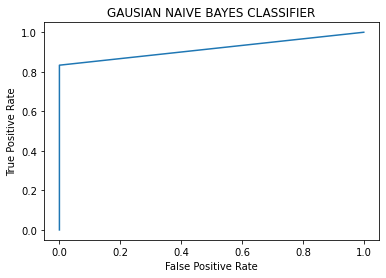

In [69]:
plot_roc_curve(y_test,y_pred)

**LIGHT GBM**

In [70]:
!pip install lightgbm


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import lightgbm as lgb

In [72]:
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)
params = {
    'objective': 'multiclass',
    'num_class': 2,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

# Make predictions on the testing set
y_pred = model.predict(x_test, num_iteration=model.best_iteration)
y_pred_class = [int(pred.argmax()) for pred in y_pred]

print("Light GBM")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class) * 100, "%")
print("Sensitivity: ", metrics.recall_score(y_test, y_pred_class) * 100, "%")
print("Specificity: ", metrics.recall_score(np.logical_not(y_test), np.logical_not(y_pred_class)) * 100, "%")  # ~y is the negation of y
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred_class))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 81, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -0.839101
[LightGBM] [Info] Start training from score -0.565808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [73]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Light GBM Classifier')

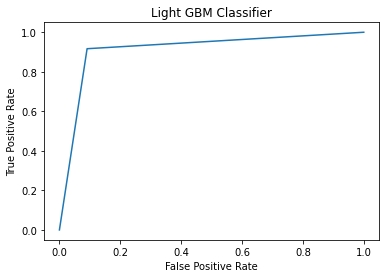

In [74]:
plot_roc_curve(y_test,y_pred_class)